# GRIP - NOV'20 DSBA TASK 2

## Author : Vijayavel S

## Prediction of the optimum number of clusters and visualize it for a given dataset:

In [1]:
# Import all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [5]:
#Load the dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Determination of the optimum number of clusters

In [6]:
#Creating an array of values from the dataset
x = df.iloc[:, [0, 1, 2, 3]].values

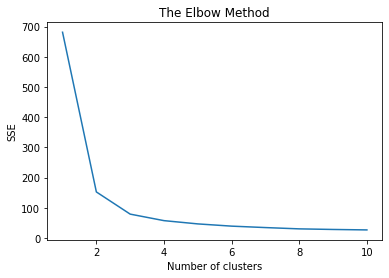

In [7]:
#Finding the sum of squares due to error SSE for each cluster count
from sklearn.cluster import KMeans
sse = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
    
#Plotting the results on a graph of SSE against Cluster numbers
plt.plot(range(1, 11), sse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

From the above graph, one can infer that the elbow occurs where the SSE doesn't decline significantly. The optimum number of clusters is the one which corresponds to where the elbow occurs. Here, it is 3.

Now that we have found our optimum number of clusters, we can move on to visualising the dataset in 3 clusters.

## Visualization of Clusters 

In [9]:
#Applying Kmeans to our dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

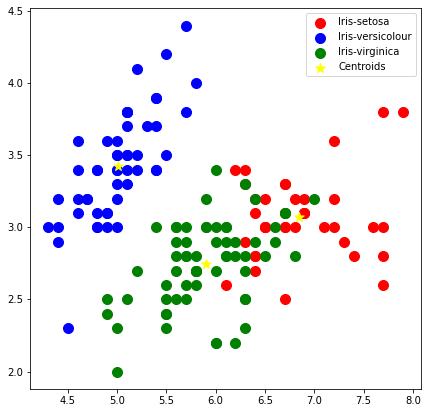

In [13]:
# Visualization of the first two columns
plt.figure(figsize=(7,7))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], marker='*', 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

Thus, using KMeans Clustering Algorithm, we have plotted the dataset on the graph in clusters, with Red representing Iris-Setosa, Blue representing Iris-Versicolour, Green representing Iris-Virginica and the stars representing Centroids.